# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [4]:
df.shape

(130, 3)

# 1. Is the distribution of body temperatures normal?
* Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.


* Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

To check whether or not the body temperatures normally are distributed, first I use graphical methods. The distribtuion of body temperatures should look like bell shape. Below, we can see a Gaussian-like shape. Thus, we can accept the data as normally distributed.


/Users/cesurdagli/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


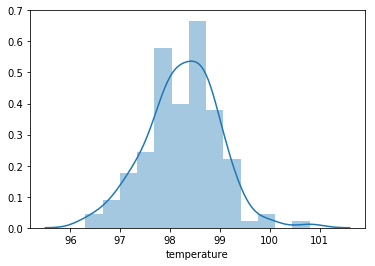

In [5]:
sns.distplot(df['temperature'])

The quantile-quantile plot can be used to check to distribution of the body tempratures. The QQ plot below shows the the scatter plot of points in a diagonal line, which closely fits the expected diagonal pattern for the body temperatures.

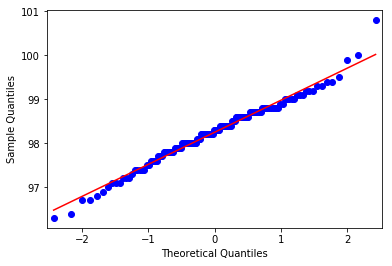

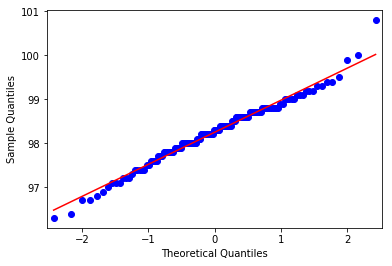

In [6]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['temperature'], line='s')

In [7]:
# calculating statistical test to check whether the data is normally distributed.
from scipy import stats
k,p=stats.mstats.normaltest(df['temperature'])# this function tests the null hypothesis that a sample comes from a normal distribution.
print(p)
print(k)
# if p value is greater than 0.05 the variable is normally distributed.
if p<0.05:
    print('varible is not normal')
else:
    print ('variable is normal')

0.2587479863488254
2.703801433319203
variable is normal


Test whether a sample differs from a normal distribution. We are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution so that if p values is greater than 0.05 the distribution of body temperatures normal.

# 2. Is the sample size large? Are the observations independent?
* Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In order to know whether or not the sample size is large, I will find the smallest needed sample size. I choose a confidence level (95%), standard deviation (0.5), and a margin of error (confidence interval) of +/- 5%. Since I am looking for a needed sample size, I will go with Z-Score for 95% confidence level, which is 1.96. To find out the needed sample size I will use this equation: (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2. 

This calculation recommends that I need to have at least 384 participants so that the given sample size (130) is not considered as a large sample size. However, as shown below we can say that with 90% confidence the sample size (greater than 96) is large enough.

All participants are counted once in this sample so that the observations are independent. Also, the correlation between body temperature and heart rate tells us to see whether or not the obsrvations are independent.

According to Central Limit Theorem, the sample size should be more than 30. in this case, the sample size (n=130) is OK. 

In [8]:
a=((1.96*1.96) * 0.5*(1 - 0.5)) / (0.1*0.1)
b=((1.96*1.96) * 0.5*(1 - 0.5)) / (0.05*0.05)
c=((1.96*1.96) * 0.5*(1 - 0.5)) / (0.01*0.01)
print('With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 1%, the needed sample size:',a )
print('With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 5%, the needed sample size:',b )
print('With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 10%, the needed sample size:',c )

With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 1%, the needed sample size: 96.03999999999998
With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 5%, the needed sample size: 384.1599999999999
With 95% confidence level, .5 standard deviation, and a margin of error (confidence interval) of +/- 10%, the needed sample size: 9603.999999999998


# 3.Is the true population mean really 98.6 degrees F?
    First, try a bootstrap hypothesis test.
    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  t or z statistic?
    Now try using the other test. How is the result be different? Why?

We are 99% confident that the mean resting body temperature of healthy adults is between 98.09 and 98.41 degrees Fahrenheit. True population mean 98.6 is not in this interval.

In [9]:
# Draw some random sample with replacement and append mean to mean_temp.
mean_temp, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(df['temperature'], replace=True, size=len(df['temperature']))
    sample_mean = temp_sample.mean()
    mean_temp.append(sample_mean)
    
# Calculate bootstrapped mean and 95%, 90%, 99% confidence interval.
boot_mean = np.mean(mean_temp)
boot_95_ci = np.percentile(mean_temp, [2.5, 97.5])
boot_90_ci = np.percentile(mean_temp, [5, 95])
boot_99_ci = np.percentile(mean_temp, [0.5, 99.5])
print("Bootstrapped Mean Temperature = {}, 90% CI = {}".format(boot_mean, boot_90_ci))
print("Bootstrapped Mean Temperature = {}, 95% CI = {}".format(boot_mean, boot_95_ci))
print("Bootstrapped Mean Temperature = {}, 99% CI = {}".format(boot_mean, boot_99_ci))

Bootstrapped Mean Temperature = 98.24988715384616, 90% CI = [98.14384615 98.35461538]
Bootstrapped Mean Temperature = 98.24988715384616, 95% CI = [98.12153846 98.37538462]
Bootstrapped Mean Temperature = 98.24988715384616, 99% CI = [98.08153846 98.41154231]


    Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
Since we check whether the sample mean differs from the population mean, I calculate a one-sample T-test. Since the p-value is less than 0.01 we can reject our null hypothesis with 99% confidence.

    In this situation, is it appropriate to use the  t or z statistic?

Normally, Z statistic is not appropriate in this situation since the standard deviation of the population is unknown. However, when the sample size is relatively large (n>96), the sample standard deviation can be used as an estimate of the population standard deviation, and a z-test can provide approximate results.

There is very strong evidence that the mean resting body temperature of healthy adults is less than the conventional value of 98.6 degrees of Fahrenheit (t = −5.4, p = .000, two-sided one-sample t-test, df = 129).

In [10]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [ ]:
# Calculate Z statistic
z=(df['temperature'].mean() - 98.6)/(df['temperature'].std()/np.sqrt(len(df)))
# Calculate and save p-value:
p = stats.norm.cdf(z) * 2
print('Z Statistic:', z)
print('p-value:', p)

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

In [11]:
# One-sample t-test
a=np.random.choice(df['temperature'], 10)
stats.ttest_1samp(a, 98.6)

Ttest_1sampResult(statistic=-0.2809757434745029, pvalue=0.7850815605068104)

In [12]:
# One-sample z-test
from statsmodels.stats.weightstats import ztest
z, p = ztest(a, value=98.6)
print('p value:', p)
print('z value:', z)

p value: 0.7787290045873467
z value: -0.2809757434745029


Since sample size is less than 30 using t test would be appropriate. Based on the p values found I can't reject the null hypothesis. On the other hand,It appears that the calculations consistently produces lower p-values from the z-test than from the t-test. Therefore, it is appropriate to use the z-test, then we have a higher likelihood of rejecting the null hypothesis.


# 5. At what temperature should we consider someone's temperature to be "abnormal"?
    As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

According to both the Bootstrap and Frequentist approaches done below: the human body temperature is 98.25 ± 1.43 degrees F) or at a 95% confidence interval, a temperature below 96.817° or above 99.681° would be considered abnormal.

In [13]:
# Draw some random sample with replacement and append mean to mean_temp.
mean_temp, sims = [], 100000
for i in range(sims):
    temp_sample = np.random.choice(df['temperature'], replace=True, size=len(df['temperature']))
    sample_mean = temp_sample.mean()
    mean_temp.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_temp)
ci = stats.norm.interval(0.95, loc=boot_mean, scale=np.std(df['temperature']))

print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))
print('margin of error: +/-{:0.5}\n\n'.format((ci[1] - boot_mean)))


95% confidence interval: 96.818 - 99.681
margin of error: +/-1.4315




In [14]:
# 95% prediction interval:
PI = stats.norm.interval(0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81775582674824, 99.68070571171332)


# 6.Is there a significant difference between males and females in normal temperature?
    What testing approach did you use and why?
    Write a story with your conclusion in the context of the original problem.

H0: No difference between male and female body temperature
H1: There is a difference between male and female body temperature

The simple calculations of groups mean show that there is a difference between the mean temperatures of males and females in the sample. Furthermore, to know whether or not this difference is statitically significant, I run a two sample t-test. Since our p-value (0.02) is less than 0.05, we can reject our null hypothesis with 95% confidence.

In [15]:
from scipy.stats import ttest_ind
df_female=df[df['gender']=='F']
df_male=df[df['gender']=='M']

x=np.mean(df_male['temperature'])
print('Male Temperature mean:', x)
y=np.mean(df_female['temperature'])
print('Female Temperature mean:', y)

stat, p = ttest_ind(df_male['temperature'], df_female['temperature'])
print(p)
print(stat)

Male Temperature mean: 98.1046153846154
Female Temperature mean: 98.39384615384613
0.02393188312239561
-2.2854345381656103
